In [1]:
import pandas as pd
import numpy as np

Dataset: Berisi tweet dari twitter yang memiliki 2 label, 1 : sentimen negatif (terkhusus rasis dan sexist), 0: tidak

In [2]:
df= pd.read_csv('sentiment_train.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
df.drop('id', axis=1, inplace=True)
df['tweet']= df['tweet'].str.strip()

df

,label,tweet
0,0,@user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


#### Text Preprocessing/Mining List:

* 1. Words Count
* 2. Character Counts
* 3. Average Word Length
* 4. Remove or Counts Stop Words
* 5. Count Hashtag (#) and Mentions (@)
* 6. Numeric Word Count
* 7. Upper Case Words Count
* 8. Lower Case Conversion
* 9. Contraction to Expansion
* 10. Finds or Count Emails
* 11. Find and Count Urls
* 12. Remove RT (Retweet) word from sentence. (Khusus untuk data twitter)
* 13. Remove Special Chars and Punctuations
* 14. Remove Multiple Spaces
* 15. Remove HTML Tags
* 16. Remove Accented Chars
* 17. Convert Word Into It's Base Form (Lemmatization)
* 18. Common/Rare Words Removal
* 19. Visualisasi Word Cloud
* 20. Spelling Correction

### 1. Words Count

Mengekstrak jumlah kata per tweet

In [4]:
df['tweet'].map(lambda x: len(x.split(' ')))

0        20
1        22
2         3
3        15
4         7
         ..
31957     5
31958    23
31959    13
31960    11
31961     6
Name: tweet, Length: 31962, dtype: int64

In [5]:
df['word_count']= df['tweet'].map(lambda x: len(x.split(' ')))

df

,label,tweet,word_count
0,0,@user when a father is dysfunctional and is so...,20
1,0,@user @user thanks for #lyft credit i can't us...,22
2,0,bihday your majesty,3
3,0,#model i love u take with u all the time in ...,15
4,0,factsguide: society now #motivation,7
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,5
31958,0,to see nina turner on the airwaves trying to w...,23
31959,0,listening to sad songs on a monday morning otw...,13
31960,1,"@user #sikh #temple vandalised in in #calgary,...",11


Dari sini kita bisa mendapatkan max atau min word lalu melakukan analisis pada data.

In [6]:
max(df['word_count'])

43

In [7]:
min(df['word_count'])

2

In [8]:
df[df['word_count']==3]

,label,tweet,word_count
2,0,bihday your majesty,3
48,0,feeling blue #illustration,3
320,0,listen up &gt;&gt;&gt;&gt;&gt;&gt;&gt;,3
344,0,tony sunday! #tonyawards,3
389,0,don't worry #bee,3
...,...,...,...
31641,0,@user .. #new#year..,3
31716,0,#zikzinday #asia#prince @user,3
31781,0,we are too!,3
31932,0,@user thanks gemma,3


### 2. Character Counts

Umumnya terdapat 2 cara, menghitung spasi atau tidak.

1. Dengan spasi

In [9]:
df['tweet'].map(lambda x: len(x))

0        101
1        122
2         19
3         84
4         38
        ... 
31957     67
31958    129
31959     61
31960     65
31961     30
Name: tweet, Length: 31962, dtype: int64

2. Tanpa spasi

In [10]:
df['tweet'].map(lambda x: len(''.join(x.split())))

0         82
1        101
2         17
3         69
4         32
        ... 
31957     63
31958    107
31959     49
31960     55
31961     25
Name: tweet, Length: 31962, dtype: int64

Kita memilih char count tanpa spasi

In [11]:
df['char_count']= df['tweet'].map(lambda x: len(''.join(x.split())))

df

,label,tweet,word_count,char_count
0,0,@user when a father is dysfunctional and is so...,20,82
1,0,@user @user thanks for #lyft credit i can't us...,22,101
2,0,bihday your majesty,3,17
3,0,#model i love u take with u all the time in ...,15,69
4,0,factsguide: society now #motivation,7,32
...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,5,63
31958,0,to see nina turner on the airwaves trying to w...,23,107
31959,0,listening to sad songs on a monday morning otw...,13,49
31960,1,"@user #sikh #temple vandalised in in #calgary,...",11,55


### 3. Average Word Length

Rata-rata panjang kata

In [12]:
df['char_count']/df['word_count']

0         4.100000
1         4.590909
2         5.666667
3         4.600000
4         4.571429
           ...    
31957    12.600000
31958     4.652174
31959     3.769231
31960     5.000000
31961     4.166667
Length: 31962, dtype: float64

In [13]:
df['avg_word_count']= df['char_count']/df['word_count']

df

,label,tweet,word_count,char_count,avg_word_count
0,0,@user when a father is dysfunctional and is so...,20,82,4.100000
1,0,@user @user thanks for #lyft credit i can't us...,22,101,4.590909
2,0,bihday your majesty,3,17,5.666667
3,0,#model i love u take with u all the time in ...,15,69,4.600000
4,0,factsguide: society now #motivation,7,32,4.571429
...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,5,63,12.600000
31958,0,to see nina turner on the airwaves trying to w...,23,107,4.652174
31959,0,listening to sad songs on a monday morning otw...,13,49,3.769231
31960,1,"@user #sikh #temple vandalised in in #calgary,...",11,55,5.000000


### 4. Remove or Counts Stop Words

Stop words merupakan kata yang paling banyak muncul/digunakan dalam suatu bahasa.

In [14]:
import nltk
from nltk.corpus import stopwords

stop_words= stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
df['tweet'][0]

'@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [16]:
[i for i in df['tweet'][0].split(' ') if i in stop_words]

['when', 'a', 'is', 'and', 'is', 'so', 'he', 'his', 'into', 'his']

In [17]:
df['stop_words_count']= df['tweet'].map(lambda x: len([i for i in x.split(' ') if i in stop_words]))

df

,label,tweet,word_count,char_count,avg_word_count,stop_words_count
0,0,@user when a father is dysfunctional and is so...,20,82,4.100000,10
1,0,@user @user thanks for #lyft credit i can't us...,22,101,4.590909,5
2,0,bihday your majesty,3,17,5.666667,1
3,0,#model i love u take with u all the time in ...,15,69,4.600000,5
4,0,factsguide: society now #motivation,7,32,4.571429,1
...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,5,63,12.600000,1
31958,0,to see nina turner on the airwaves trying to w...,23,107,4.652174,9
31959,0,listening to sad songs on a monday morning otw...,13,49,3.769231,5
31960,1,"@user #sikh #temple vandalised in in #calgary,...",11,55,5.000000,2


Untuk menghapus stopwords kita tinggal melakukan kebalikan saat mencari stop words

In [18]:
df['tweet'].map(lambda x: ' '.join([i for i in x.split(' ') if i not in stop_words]))

0        @user father dysfunctional selfish drags kids ...
1        @user @user thanks #lyft credit can't use caus...
2                                           bihday majesty
3        #model   love u take u time urð±!!! ðð...
4                       factsguide: society    #motivation
                               ...                        
31957    ate @user isz youuu?ððððððð...
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960    @user #sikh #temple vandalised #calgary, #wso ...
31961                                   thank @user follow
Name: tweet, Length: 31962, dtype: object

### 5. Count Hashtag (#) and Mentions (@)

Idenya yaitu mendeteksi kata yang diawali # atau @

In [19]:
df['tweet'][0]

'@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [20]:
[i for i in df['tweet'][0].split(' ') if i.startswith('#')]

['#run']

In [21]:
[i for i in df['tweet'][0].split(' ') if i.startswith('@')]

['@user']

Hashtag Count

In [22]:
df['tweet'].map(lambda x: len([i for i in x.split(' ') if i.startswith('#')]))

0        1
1        3
2        0
3        1
4        1
        ..
31957    0
31958    2
31959    0
31960    4
31961    0
Name: tweet, Length: 31962, dtype: int64

In [23]:
df['hashtag_count']= df['tweet'].map(lambda x: len([i for i in x.split(' ') if i.startswith('#')]))

Mention Count

In [24]:
df['tweet'].map(lambda x: len([i for i in x.split(' ') if i.startswith('@')]))

0        1
1        2
2        0
3        0
4        0
        ..
31957    1
31958    0
31959    0
31960    1
31961    1
Name: tweet, Length: 31962, dtype: int64

In [25]:
df['mention_count']= df['tweet'].map(lambda x: len([i for i in x.split(' ') if i.startswith('@')]))

df

,label,tweet,word_count,char_count,avg_word_count,stop_words_count,hashtag_count,mention_count
0,0,@user when a father is dysfunctional and is so...,20,82,4.100000,10,1,1
1,0,@user @user thanks for #lyft credit i can't us...,22,101,4.590909,5,3,2
2,0,bihday your majesty,3,17,5.666667,1,0,0
3,0,#model i love u take with u all the time in ...,15,69,4.600000,5,1,0
4,0,factsguide: society now #motivation,7,32,4.571429,1,1,0
...,...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,5,63,12.600000,1,0,1
31958,0,to see nina turner on the airwaves trying to w...,23,107,4.652174,9,2,0
31959,0,listening to sad songs on a monday morning otw...,13,49,3.769231,5,0,0
31960,1,"@user #sikh #temple vandalised in in #calgary,...",11,55,5.000000,2,4,1


### 6. Numeric Word Count

Check if a word in sentence/tweets are number

In [26]:
df['tweet'].map(lambda x: len([i for i in x.split() if i.isdigit()]))

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    0
31961    0
Name: tweet, Length: 31962, dtype: int64

In [27]:
df['digit_word_count']= df['tweet'].map(lambda x: len([i for i in x.split() if i.isdigit()]))

df

,label,tweet,word_count,char_count,avg_word_count,stop_words_count,hashtag_count,mention_count,digit_word_count
0,0,@user when a father is dysfunctional and is so...,20,82,4.100000,10,1,1,0
1,0,@user @user thanks for #lyft credit i can't us...,22,101,4.590909,5,3,2,0
2,0,bihday your majesty,3,17,5.666667,1,0,0,0
3,0,#model i love u take with u all the time in ...,15,69,4.600000,5,1,0,0
4,0,factsguide: society now #motivation,7,32,4.571429,1,1,0,0
...,...,...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,5,63,12.600000,1,0,1,0
31958,0,to see nina turner on the airwaves trying to w...,23,107,4.652174,9,2,0,0
31959,0,listening to sad songs on a monday morning otw...,13,49,3.769231,5,0,0,0
31960,1,"@user #sikh #temple vandalised in in #calgary,...",11,55,5.000000,2,4,1,0


In [28]:
df.sample(5)

,label,tweet,word_count,char_count,avg_word_count,stop_words_count,hashtag_count,mention_count,digit_word_count
9260,0,i am thankful for good health. #thankful #posi...,8,43,5.375000,3,2,0,0
20692,0,is there anything better than a friday? yes! p...,16,83,5.187500,4,3,1,0
5767,0,mattlaw - cultures and cars: #horny #nude #xxx...,19,89,4.684211,1,12,0,0
30761,1,@user #boycotttigerwoods. stop #normalizing @u...,8,62,7.750000,0,4,2,0
423,0,cannot wait for #eurogamer this year! #pumped ...,10,53,5.300000,2,3,0,0


In [29]:
sum(df['digit_word_count'])

2537

### 7. Upper Case Words Count

Menghitung kata (bukan huruf awal dari kata) yang berupa huruf kapital. Mengapa? karena biasanya kata dengan full huruf kapital terdapat penekanan di dalamnya (entah positif atau negatif). Misal:
* KAMU BODOH
* Kamu bodoh

Kita bisa melihat bahwa pembawaan kalimat pertama terkesan lebih emosi daripada kalimat kedua.

In [30]:
[i for i in df['tweet'][1].split() if i.isupper()]

[]

In [31]:
df['upper_word_count']= df['tweet'].map(lambda x: len([i for i in x.split() if i.isupper()]))

df

,label,tweet,word_count,char_count,avg_word_count,stop_words_count,hashtag_count,mention_count,digit_word_count,upper_word_count
0,0,@user when a father is dysfunctional and is so...,20,82,4.100000,10,1,1,0,0
1,0,@user @user thanks for #lyft credit i can't us...,22,101,4.590909,5,3,2,0,0
2,0,bihday your majesty,3,17,5.666667,1,0,0,0,0
3,0,#model i love u take with u all the time in ...,15,69,4.600000,5,1,0,0,0
4,0,factsguide: society now #motivation,7,32,4.571429,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,5,63,12.600000,1,0,1,0,0
31958,0,to see nina turner on the airwaves trying to w...,23,107,4.652174,9,2,0,0,0
31959,0,listening to sad songs on a monday morning otw...,13,49,3.769231,5,0,0,0,0
31960,1,"@user #sikh #temple vandalised in in #calgary,...",11,55,5.000000,2,4,1,0,0


<hr>

Karena ```df``` telah memiliki banyak kolom kita akan membuat ulang ```df```

In [32]:
df= pd.read_csv('sentiment_train.csv')
df.drop('id', axis=1, inplace=True)

df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


### 8. Lower Case Conversion

In [33]:
df['tweet']= df['tweet'].map(lambda x: x.lower())

df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


### 9. Contraction to Expansion

Contraction dalam bahasa inggris merupakan kata yang disingkat. Misalnya 
* he'll
* i'm
* you're
* dll. 

Dalam preprosess contraction to expansion kita akan mengubah kata-kata tersebut menjadi
* he will
* i am
* you are
* dll.

Untuk mengexpand contraction kita bisa membuat dictionary yang melakukan mapping, atau kita juga bisa mengimport library contractions untuk melakukan hal tersebut.

In [34]:
!pip -q install contractions

In [35]:
text= df['tweet'][1]
text

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [36]:
import contractions

expanded_words = []
for word in text.split():
    expanded_words.append(contractions.fix(word))
    
expanded_text = ' '.join(expanded_words)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)

Original text: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Expanded_text: @user @user thanks for #lyft credit i cannot use because they do not offer wheelchair vans in pdx. #disapointed #getthanked


In [37]:
def expand_contractions(x):
    expanded_words = []
    for word in str(x).split():
        expanded_words.append(contractions.fix(word))

    expanded_text = ' '.join(expanded_words)
    
    return expanded_text

In [38]:
df['tweet']= df['tweet'].map(expand_contractions)

df

,label,tweet
0,0,@user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i cannot u...
2,0,bihday your majesty
3,0,#model i love you take with you all the time i...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


### 10. Finds or Count Emails

Menggunakan regex

In [39]:
import re

email_pattern= r'[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}'

In [40]:
df['tweet'].map(lambda x: re.findall(email_pattern, x))

0        []
1        []
2        []
3        []
4        []
         ..
31957    []
31958    []
31959    []
31960    []
31961    []
Name: tweet, Length: 31962, dtype: object

In [41]:
df['emails']= df['tweet'].map(lambda x: re.findall(email_pattern, x))
df['emails_count']= df['emails'].map(lambda x: len(x))

df

,label,tweet,emails,emails_count
0,0,@user when a father is dysfunctional and is so...,[],0
1,0,@user @user thanks for #lyft credit i cannot u...,[],0
2,0,bihday your majesty,[],0
3,0,#model i love you take with you all the time i...,[],0
4,0,factsguide: society now #motivation,[],0
...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,[],0
31958,0,to see nina turner on the airwaves trying to w...,[],0
31959,0,listening to sad songs on a monday morning otw...,[],0
31960,1,"@user #sikh #temple vandalised in in #calgary,...",[],0


In [42]:
df[df['emails_count']>0]

,label,tweet,emails,emails_count


### 11. Find and Count Urls

In [43]:
url_pattern= r'''(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))'''

url_pattern

'(?i)\\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\\s()<>{}\\[\\]]+|\\([^\\s()]*?\\([^\\s()]+\\)[^\\s()]*?\\)|\\([^\\s]+

In [44]:
re.findall(url_pattern, 'http://google.com httpsasd://alslo.lol github.co.id')

['http://google.com', 'github.co.id']

In [45]:
df['tweet'].map(lambda x: re.findall(url_pattern, x))

0        []
1        []
2        []
3        []
4        []
         ..
31957    []
31958    []
31959    []
31960    []
31961    []
Name: tweet, Length: 31962, dtype: object

In [46]:
df['url_flags']= df['tweet'].map(lambda x: re.findall(url_pattern, x))
df['url_flags_count']= df['url_flags'].map(lambda x: len(x))

df

,label,tweet,emails,emails_count,url_flags,url_flags_count
0,0,@user when a father is dysfunctional and is so...,[],0,[],0
1,0,@user @user thanks for #lyft credit i cannot u...,[],0,[],0
2,0,bihday your majesty,[],0,[],0
3,0,#model i love you take with you all the time i...,[],0,[],0
4,0,factsguide: society now #motivation,[],0,[],0
...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,[],0,[],0
31958,0,to see nina turner on the airwaves trying to w...,[],0,[],0
31959,0,listening to sad songs on a monday morning otw...,[],0,[],0
31960,1,"@user #sikh #temple vandalised in in #calgary,...",[],0,[],0


In [47]:
df[df['url_flags_count']>0]

,label,tweet,emails,emails_count,url_flags,url_flags_count
1066,0,oh.my.books its so beautiful! oh the feels! al...,[],0,[oh.my],1
1067,0,"yes lovely, such sad, sick times.be glad when ...",[],0,[times.be],1
1111,0,#fly #and #better #with #us #buranus #www.flyb...,[],0,[www.flybcc.com],1
1655,0,wh is enemy deployed google for illegal manip....,[],0,[manip.in],1
1765,0,"just got surprise,the chickies are coming, nic...",[],0,[announcement.it],1
2029,0,@user @user there are bad apples in every barr...,[],0,[barrel.no],1
2442,0,@user @user still got my 50p off all drinks ca...,[],0,[card.do],1
3599,0,@user @user d pic of dad&amp;daughtr duo is ad...,[],0,[awsssssm.as],1
3877,0,@user live right noww!!!!!!!!!!!! #vocal voyag...,[],0,[realbuzzradio.com],1
6508,0,"@user this world, this country.so much turmoil...",[],0,[country.so],1


In [48]:
df[df['url_flags_count']>0].iloc[2,:].tweet

'#fly #and #better #with #us #buranus #www.flybcc.com #call #7/24 #airbroker #flightâ\x80¦'

### 12. Remove RT (Retweet) word from sentence. (Khusus untuk data twitter)

In [49]:
rt_text= 'rt @user: blablabla'

rt_pattern= r'\brt\b'
re.sub(rt_pattern, '', rt_text)

' @user: blablabla'

In [50]:
df['tweet']= df['tweet'].map(lambda x: re.sub(rt_pattern, '', x).strip())

df

,label,tweet,emails,emails_count,url_flags,url_flags_count
0,0,@user when a father is dysfunctional and is so...,[],0,[],0
1,0,@user @user thanks for #lyft credit i cannot u...,[],0,[],0
2,0,bihday your majesty,[],0,[],0
3,0,#model i love you take with you all the time i...,[],0,[],0
4,0,factsguide: society now #motivation,[],0,[],0
...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,[],0,[],0
31958,0,to see nina turner on the airwaves trying to w...,[],0,[],0
31959,0,listening to sad songs on a monday morning otw...,[],0,[],0
31960,1,"@user #sikh #temple vandalised in in #calgary,...",[],0,[],0


### 13. Remove Special Chars and Punctuations

Terdapat beberapa pattern tapi di sini kita akan menggunakan pattern sederhana (hanya menerima huruf dan angka)

In [51]:
invalid_word_pattern= r'[^\w\d ]'

In [52]:
df['tweet_removed_punctuations']= df['tweet'].map(lambda x: re.sub(invalid_word_pattern, '', x))

df

,label,tweet,emails,emails_count,url_flags,url_flags_count,tweet_removed_punctuations
0,0,@user when a father is dysfunctional and is so...,[],0,[],0,user when a father is dysfunctional and is so ...
1,0,@user @user thanks for #lyft credit i cannot u...,[],0,[],0,user user thanks for lyft credit i cannot use ...
2,0,bihday your majesty,[],0,[],0,bihday your majesty
3,0,#model i love you take with you all the time i...,[],0,[],0,model i love you take with you all the time in...
4,0,factsguide: society now #motivation,[],0,[],0,factsguide society now motivation
...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,[],0,[],0,ate user isz that youuuðððððððððâï
31958,0,to see nina turner on the airwaves trying to w...,[],0,[],0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...,[],0,[],0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",[],0,[],0,user sikh temple vandalised in in calgary wso ...


### 14. Remove Multiple Spaces

In [53]:
text= 'Hi     My name   is yusuf'

' '.join(text.split())

'Hi My name is yusuf'

In [54]:
df['tweet']= df['tweet'].map(lambda x: ' '.join(x.split()))

df

,label,tweet,emails,emails_count,url_flags,url_flags_count,tweet_removed_punctuations
0,0,@user when a father is dysfunctional and is so...,[],0,[],0,user when a father is dysfunctional and is so ...
1,0,@user @user thanks for #lyft credit i cannot u...,[],0,[],0,user user thanks for lyft credit i cannot use ...
2,0,bihday your majesty,[],0,[],0,bihday your majesty
3,0,#model i love you take with you all the time i...,[],0,[],0,model i love you take with you all the time in...
4,0,factsguide: society now #motivation,[],0,[],0,factsguide society now motivation
...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,[],0,[],0,ate user isz that youuuðððððððððâï
31958,0,to see nina turner on the airwaves trying to w...,[],0,[],0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...,[],0,[],0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",[],0,[],0,user sikh temple vandalised in in calgary wso ...


### 15. Remove HTML Tags

In [55]:
from bs4 import BeautifulSoup

In [56]:
x= '<html>This is a <span>blog</span></html>'

BeautifulSoup(x, 'lxml').get_text()

'This is a blog'

In [57]:
df['tweet']= df['tweet'].map(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

df

,label,tweet,emails,emails_count,url_flags,url_flags_count,tweet_removed_punctuations
0,0,@user when a father is dysfunctional and is so...,[],0,[],0,user when a father is dysfunctional and is so ...
1,0,@user @user thanks for #lyft credit i cannot u...,[],0,[],0,user user thanks for lyft credit i cannot use ...
2,0,bihday your majesty,[],0,[],0,bihday your majesty
3,0,#model i love you take with you all the time i...,[],0,[],0,model i love you take with you all the time in...
4,0,factsguide: society now #motivation,[],0,[],0,factsguide society now motivation
...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,[],0,[],0,ate user isz that youuuðððððððððâï
31958,0,to see nina turner on the airwaves trying to w...,[],0,[],0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...,[],0,[],0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",[],0,[],0,user sikh temple vandalised in in calgary wso ...


### 16. Remove Accented Chars

In [58]:
accented_chars= 'Ó óÑ ñÆ, æ'

accented_chars

'Ó óÑ ñÆ, æ'

Kita akan menggunakan ascii encoder dan mendecode menggunakan utf-8, jika terdapat error kita akan mengabaikan error tersebut (ignore)

In [59]:
import unicodedata

def remove_accented_chars(x):
    x= unicodedata.normalize('NFKD', x).encode('ascii', errors='ignore').decode('utf-8', errors='ignore')
    return x

In [60]:
remove_accented_chars(accented_chars)

'O oN n, '

In [61]:
df['tweet']= df['tweet'].map(remove_accented_chars)

df

,label,tweet,emails,emails_count,url_flags,url_flags_count,tweet_removed_punctuations
0,0,@user when a father is dysfunctional and is so...,[],0,[],0,user when a father is dysfunctional and is so ...
1,0,@user @user thanks for #lyft credit i cannot u...,[],0,[],0,user user thanks for lyft credit i cannot use ...
2,0,bihday your majesty,[],0,[],0,bihday your majesty
3,0,#model i love you take with you all the time i...,[],0,[],0,model i love you take with you all the time in...
4,0,factsguide: society now #motivation,[],0,[],0,factsguide society now motivation
...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ai,[],0,[],0,ate user isz that youuuðððððððððâï
31958,0,to see nina turner on the airwaves trying to w...,[],0,[],0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...,[],0,[],0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",[],0,[],0,user sikh temple vandalised in in calgary wso ...


### 17. Convert Word Into It's Base Form (Lemmatization)

In [62]:
sentence = "The striped bats are hanging on their feet for best"

* Menggunakan nltk

In [63]:
from nltk.stem import WordNetLemmatizer

lemm= WordNetLemmatizer()

print(lemm.lemmatize('increases'))

increase


In [64]:
word_list = nltk.word_tokenize(sentence)
lemmatized_output = ' '.join([lemm.lemmatize(w) for w in word_list])
lemmatized_output

'The striped bat are hanging on their foot for best'

Saat menggunakan nltk, hasilnya kurang bagus karena kata 'are' tidak menjadi 'be', dan 'hanging' tidak menjadi 'hang'

* Menggunakan spacy

In [65]:
import spacy

nlp= spacy.load('en_core_web_md')

In [66]:
text= 'hanging'

doc= nlp(text)

doc[0].lemma_

'hang'

In [67]:
def make_to_base(x):
    x= str(x)
    x_list= []
    doc= nlp(x)
    
    for token in doc:
        lemma= token.lemma_
        
# #         Kondisi jika jika ingin menyimpan are/is/am
#         if lemma=='-PRON-' or lemma=='be':
#             lemma= token.text
            
        x_list.append(lemma)
        
    return ' '.join(x_list)

In [68]:
make_to_base(sentence)

'the stripe bat be hang on their foot for good'

In [69]:
df['tweet']= df['tweet'].map(make_to_base)

df

,label,tweet,emails,emails_count,url_flags,url_flags_count,tweet_removed_punctuations
0,0,@user when a father be dysfunctional and be so...,[],0,[],0,user when a father is dysfunctional and is so ...
1,0,@user @user thank for # lyft credit I can not ...,[],0,[],0,user user thanks for lyft credit i cannot use ...
2,0,bihday your majesty,[],0,[],0,bihday your majesty
3,0,# model I love you take with you all the time ...,[],0,[],0,model i love you take with you all the time in...
4,0,factsguide : society now # motivation,[],0,[],0,factsguide society now motivation
...,...,...,...,...,...,...,...
31957,0,eat @user isz that youuu?ai,[],0,[],0,ate user isz that youuuðððððððððâï
31958,0,to see nina turner on the airwave try to wrap ...,[],0,[],0,to see nina turner on the airwaves trying to w...
31959,0,listen to sad song on a monday morning otw to ...,[],0,[],0,listening to sad songs on a monday morning otw...
31960,1,@user # sikh # temple vandalise in in # calgar...,[],0,[],0,user sikh temple vandalised in in calgary wso ...


### 18. Common/Rare Words Removal

Misal kita ingin menghapus kata-kata yang paling sering/jarang muncul di corpus kita (walaupun ini jarang dilakukan karena ini bisa saja menghilangkan makna dari kalimat)

In [70]:
text= ' '.join(df['tweet'].values)

len(text), text[:1000]

(2624062,
 '@user when a father be dysfunctional and be so selfish he drag his kid into his dysfunction . # run @user @user thank for # lyft credit I can not use because they do not offer wheelchair van in pdx . # disapointe # getthanke bihday your majesty # model I love you take with you all the time in you be ! ! !   factsguide : society now # motivation [ 2/2 ] huge fan fare and big talk before they leave . chaos and pay dispute when they get there . # allshowandnogo @user camping tomorrow @user @user @user @user @user @user @user dannya the next school year be the year for exam .   can not think about that   # school # exam # hate # imagine # actorslife # revolutionschool # girl we win ! ! ! love the land ! ! ! # allin # cavs # champion # cleveland # clevelandcavalier a @user @user welcome here ! I be it be so # gr8 ! a # ireland consumer price index ( mom ) climb from previous 0.2 % to 0.5 % in may # blog # silver # gold # forex we be so selfish . # orlando # standwithorlando # pu

In [71]:
text= text.split()

len(text)

547135

In [72]:
comm_words= pd.Series(text).value_counts()

comm_words

#             74868
@user         17361
be            15983
!             14402
.             12192
              ...  
barren            1
phenomenal        1
beoplay           1
makingplan        1
chisolm           1
Length: 39180, dtype: int64

Misalkan kita akan menghapus 20 kata yang paling sering muncul

In [73]:
comm_words[:20]

#        74868
@user    17361
be       15983
!        14402
.        12192
the      10189
to       10108
I         9155
a         8774
you       7576
,         6262
and       4900
in        4655
for       4492
of        4264
not       3731
my        3688
it        3581
have      3186
love      2944
dtype: int64

In [74]:
df['tweet'].map(lambda x: ' '.join([i for i in x.split() if i not in comm_words[:20]]))

0        when father dysfunctional so selfish he drag h...
1        thank lyft credit can use because they do offe...
2                                      bihday your majesty
3                                 model take with all time
4                      factsguide : society now motivation
                               ...                        
31957                                eat isz that youuu?ai
31958    see nina turner on airwave try wrap herself ma...
31959       listen sad song on monday morning otw work sad
31960        sikh temple vandalise calgary wso condemn act
31961                                         thank follow
Name: tweet, Length: 31962, dtype: object

Selanjutnya menghapus 20 kata yang paling jarang muncul

In [75]:
comm_words[-21:-1] # Atau comm_words.tail(20)

nii             1
pappia          1
wuss            1
tramp           1
desksetup       1
roccat          1
paiculair       1
i1ea            1
freeaoi         1
egregious       1
happyaso        1
comefaster      1
natalia         1
nonke           1
vkontakte       1
immunologist    1
barren          1
phenomenal      1
beoplay         1
makingplan      1
dtype: int64

In [76]:
df['tweet'].map(lambda x: ' '.join([i for i in x.split() if i not in comm_words[-21:-1]]))

0        @user when a father be dysfunctional and be so...
1        @user @user thank for # lyft credit I can not ...
2                                      bihday your majesty
3        # model I love you take with you all the time ...
4                    factsguide : society now # motivation
                               ...                        
31957                          eat @user isz that youuu?ai
31958    to see nina turner on the airwave try to wrap ...
31959    listen to sad song on a monday morning otw to ...
31960    @user # sikh # temple vandalise in in # calgar...
31961                       thank you @user for you follow
Name: tweet, Length: 31962, dtype: object

In [77]:
!pip install wordcloud

### 19. Visualisasi Word Cloud

Word Cloud merupakan visualisasi untuk text, salah satu kegunaannya yaitu untuk mengetahui kata paling sering muncul dalam corpus.

In [78]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

In [79]:
text= ' '.join(df['tweet'])

(-0.5, 999.5, 599.5, -0.5)

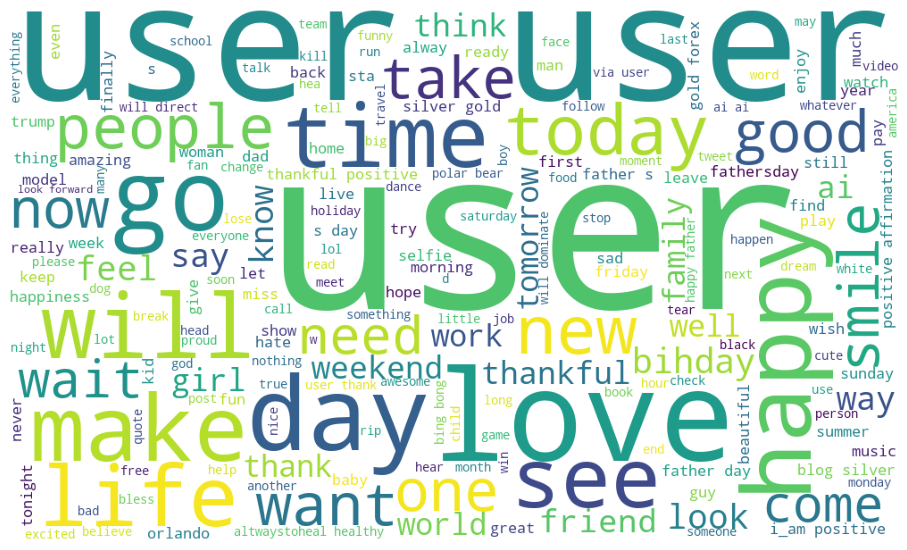

In [80]:
plt.figure(figsize=(16,10))
wc= WordCloud(width= 1000, height= 600, max_words=200, background_color='white').generate(text)
plt.imshow(wc)
plt.axis('off')

### 20. Spelling Correction

Untuk spelling correction khusus untuk bahasa inggris kita akan menggunakan library ```textblob```

In [81]:
!pip install -q -U textblob

!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to

In [82]:
from textblob import TextBlob

text= 'you arre actig likke ddisguhting aninal'
TextBlob(text).correct()

TextBlob("you are acting like disgusting animal")